# Biodiversity in National Park Data Analysis Project

Using data from the National Park Service, I will analyize data on the conversatin statuses of speciies and investigate if there are any patterns to the types of species that become endangered.

- Phase 1: Data load & Cleaup

- Phase 2: Initial Exploration

- Phase 3: Multivariable Visuals

- Conclusion



## Import Libraries

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Loading in the data files

In [197]:
observe = pd.read_csv('observations.csv')

species = pd.read_csv('species_info.csv')

## Inspecting first five rows of each dataframe
The second dataframe, the "species", seems to have missing data. This seems to be intentional, however, as it deals with conversation status, which not all species are subject to (i.e., some are existing in a healthy and normal range of population). More information needs to be revealed, however. But we will get to that!

In [198]:
print(observe.head())

print(species.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic 

## Some more basic metadata 
It appears that the types of each data series is in order

In [199]:
print(observe.dtypes)
print(" ")
print(species.dtypes)
print("")
print(observe.describe())
print("")
print(species.describe())

scientific_name    object
park_name          object
observations        int64
dtype: object
 
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000

              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  


Below, we can see the number of unique values in each of the data series. Save for category and conservation status, almost all of the other names are unique.

In [200]:
print(species["conservation_status"].unique())
print(observe["scientific_name"].nunique())
print(species["common_names"].nunique())
print(species["scientific_name"].nunique())
print(species["category"].nunique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
5541
5504
5541
7


By adding a column in the species dataframe, I am able to generalize some data so that I can come to a more clear conclusion

In [201]:
species['conservation_status'] = species['conservation_status'].fillna('Non-Status')
species['is_protected'] = species.conservation_status != 'Non-Status'
species['conservation_status'] = species['conservation_status'].replace('Non-Status', np.nan)

The vast majority of species are not protected. 

Text(0.5, 1.0, 'Count Against Protection')

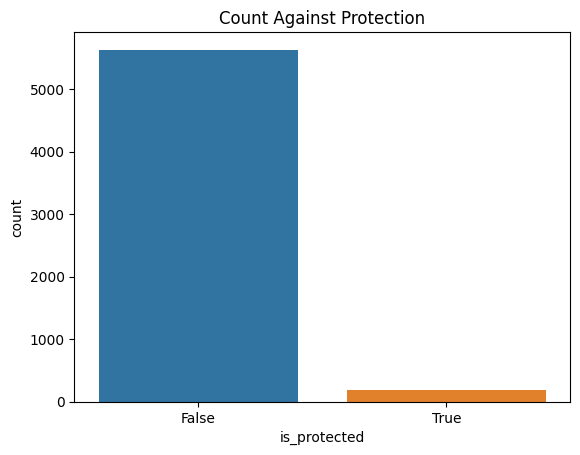

In [221]:
sns.countplot(data=species, x="is_protected")
plt.title("Count Against Protection")

Of the species that are protected, "species of concern" is the majority of such cases. 

Text(0.5, 1.0, 'Count Against Conservation Status')

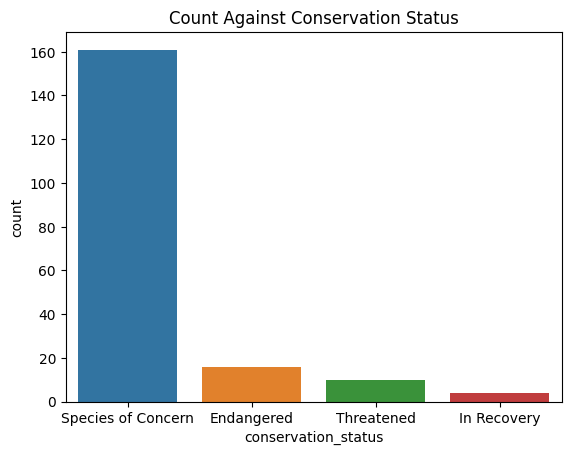

In [211]:
sns.countplot(data=species, x="conservation_status")
plt.title("Count Against Conservation Status")

The majority of species seem to be in the category of a vascular plant.

Text(0.5, 1.0, 'Count Against Category of Species')

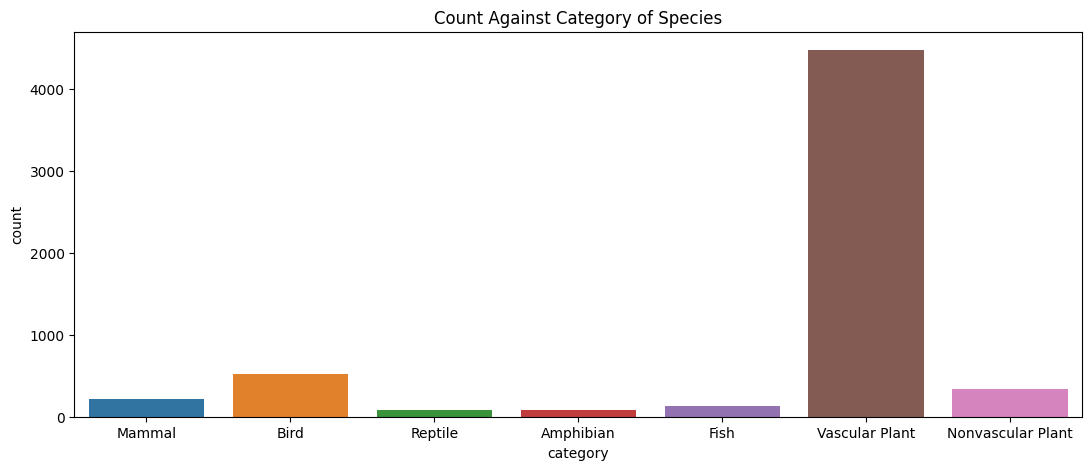

In [218]:
plt.figure(figsize=(13,5))

sns.countplot(data=species,x='category')
plt.title("Count Against Category of Species")


## Multivariate Visuals

Yellowstone National Park, within the dataset, sees the most observations.

Text(0.5, 1.0, 'Observations Against Park')

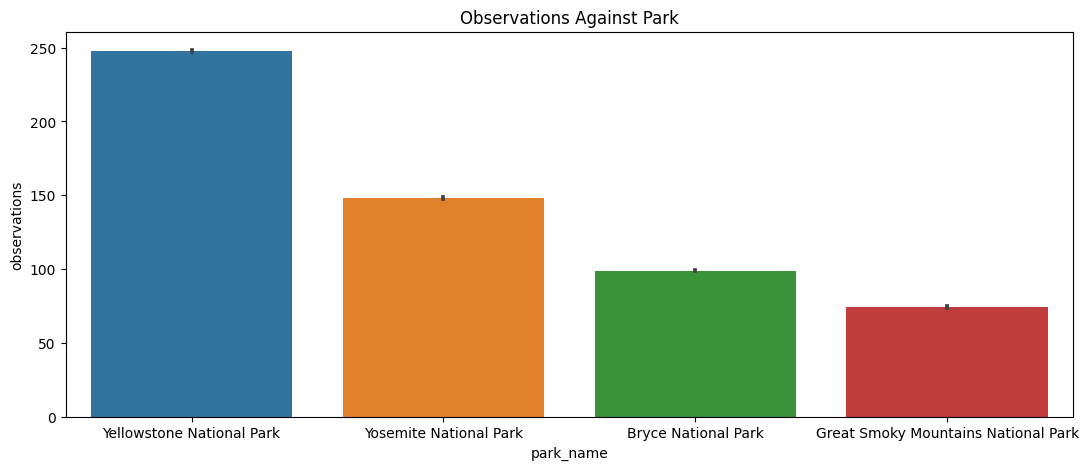

In [216]:
order = observe.groupby("park_name")["observations"].sum().sort_values(ascending=False).index
plt.figure(figsize=(13,5))
sns.barplot(data=observe,x="park_name",y="observations",order=order)
plt.title("Observations Against Park")

Of the species that are protected, it sees that Birds, Vascular Plants, and Mammals are the greatest in terms of protected statuses

<Axes: xlabel='category', ylabel='count'>

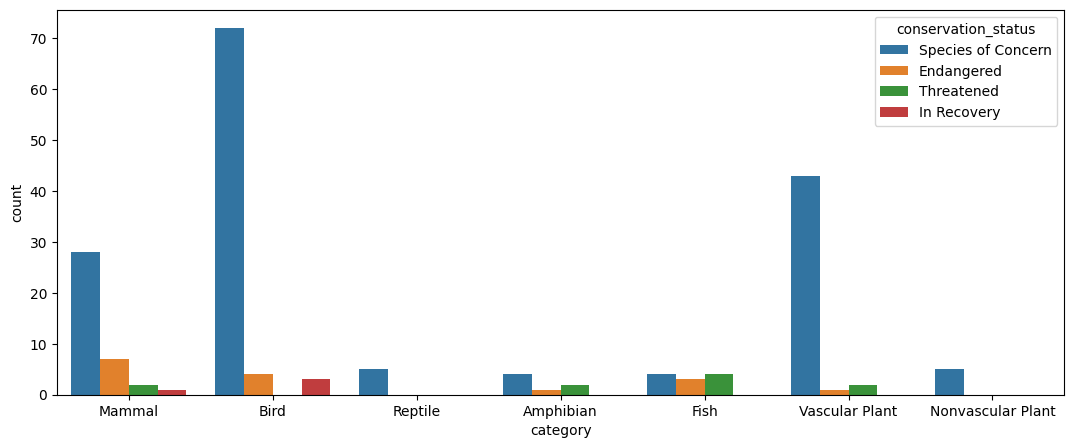

In [206]:
plt.figure(figsize=(13,5))
species['conservation_status'] = species['conservation_status'].replace('Non-Status', np.nan)
sns.countplot(data=species, x='category', hue='conservation_status')

This one is an interesting find; althogh protected species are far and by far outnumbered by unportected species, they have very similiar observation rates at each park when compared next to each other. This may suggest that there are more observations for at-risk species than there are for non-at-risk ones, at least on a per-species basis.

<Axes: xlabel='park_name', ylabel='observations'>

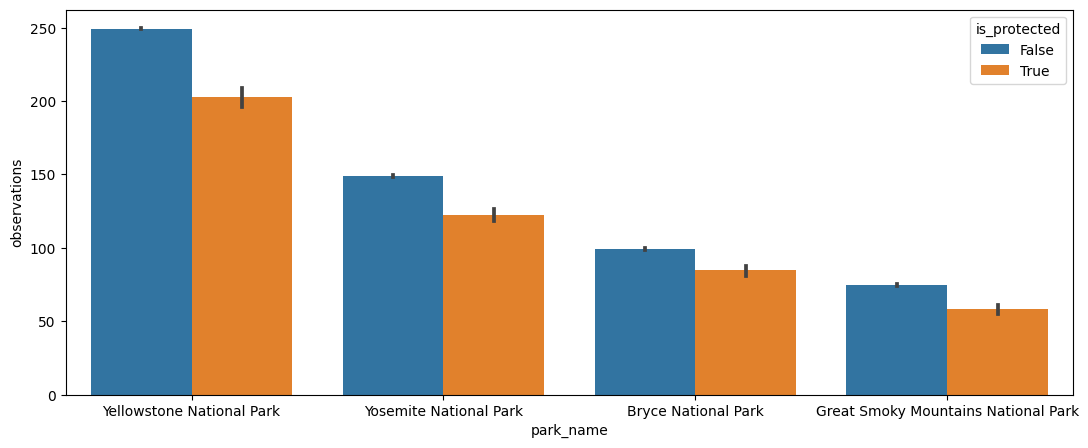

In [220]:

merged_data = pd.merge(observe, species, on='scientific_name')

plt.figure(figsize=(13,5))
order = merged_data.groupby("park_name")["observations"].sum().sort_values(ascending=False).index


sns.barplot(data=merged_data,x="park_name",y="observations",hue="is_protected",order=order)

# Conclusions:

- In quantity alone, there are far more non-protected species than there are protected ones

- Amongst the protected species 'Species of Concern' seem to be the largest of the them

- Yellowstone Park has the greates number of observations out of any park in the dataset

- Birds, Vascular Plants, and Mammals (in that order) are the three largest groups in terms of rates of protection-statuses

- Proteted species see more observations on a per animal basis (averaged out) when compared to non-protected species. This is drawn from the finding that they have similiar amounts of observations across all parks, even though in terms of species quantity, they are outnumbered vastly. 